In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [2]:
# Define the HiPPO matrix function
def hippo_matrix(N):
    A = np.zeros((N, N))
    for n in range(N):
        for k in range(N):
            if n > k:
                A[n, k] = (-1)**(n-k) * (2*k + 1)
            elif n == k:
                A[n, k] = k + 1
            else:
                A[n, k] = 0
    return A

In [3]:
# Define the V matrix function
def v_matrix(N):
    V = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if i >= j:  # Ensure the binomial coefficient is valid
                V[i, j] = sp.comb(i + j, i - j)
    return V

In [4]:
# Generate the HiPPO matrix for a given size
N = 10  # You can adjust this size for a larger or smaller matrix
A = hippo_matrix(N)
V = v_matrix(N)

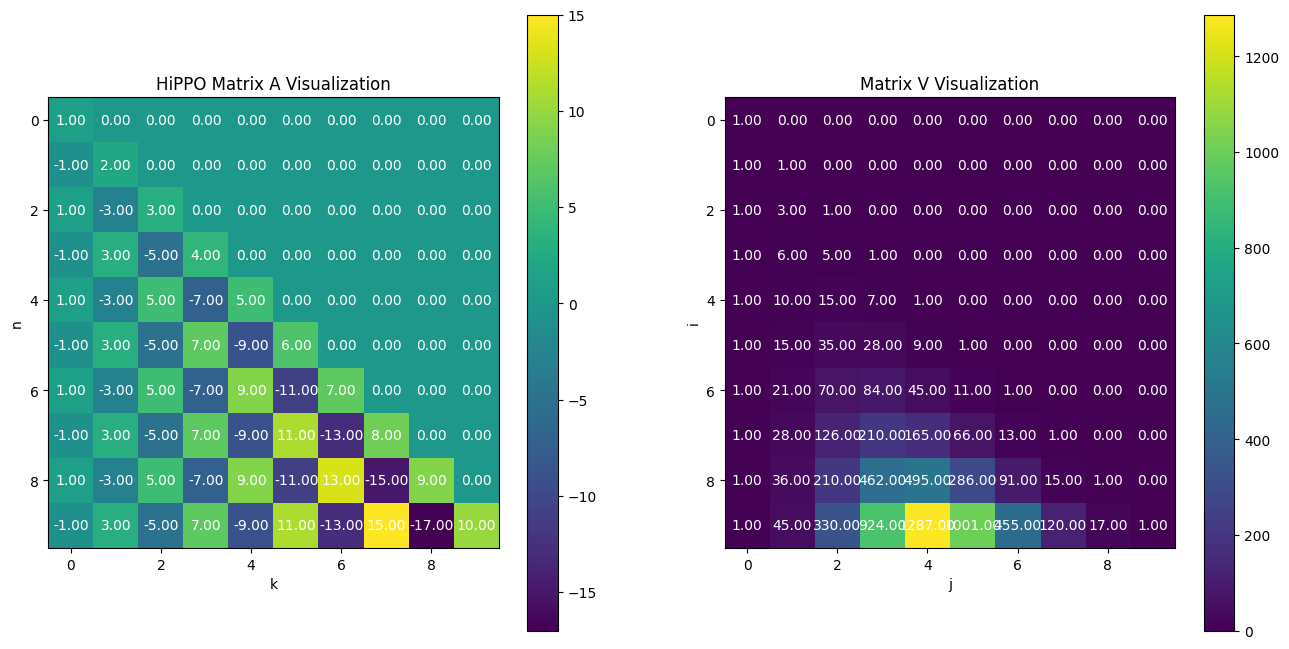

In [5]:
# Visualize the HiPPO matrix A and the V matrix side by side
plt.figure(figsize=(16, 8))

# Plot HiPPO matrix A
plt.subplot(1, 2, 1)
plt.imshow(A, cmap='viridis', interpolation='none')
for i in range(N):
    for j in range(N):
        plt.text(j, i, f"{A[i, j]:.2f}", ha='center', va='center', color='white')
plt.colorbar()
plt.title('HiPPO Matrix A Visualization')
plt.xlabel('k')
plt.ylabel('n')

# Plot V matrix
plt.subplot(1, 2, 2)
plt.imshow(V, cmap='viridis', interpolation='none')
for i in range(N):
    for j in range(N):
        plt.text(j, i, f"{V[i, j]:.2f}", ha='center', va='center', color='white')
plt.colorbar()
plt.title('Matrix V Visualization')
plt.xlabel('j')
plt.ylabel('i')

plt.show()


In [6]:
# Diagonalize A using V
V_inv = np.linalg.inv(V)
D = V_inv @ A @ V

# Verify if D is a diagonal matrix
is_diagonal = np.allclose(D, np.diag(np.diagonal(D)))

print("Diagonal Matrix D:")
print(D)
print("Is Diagonal:", is_diagonal)

Diagonal Matrix D:
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.18375389e-12  2.00000000e+00  1.43827136e-11  1.10886166e-11
   4.67856060e-12  1.20451278e-12  1.44883526e-13  8.19310056e-15
   2.35526416e-16  0.00000000e+00]
 [-7.45704438e-14 -2.28444809e-12  3.00000000e+00 -5.83955257e-12
  -2.53471998e-12 -6.33873191e-13 -8.95957799e-14 -6.02280129e-15
  -2.26804298e-15  0.00000000e+00]
 [ 2.26844374e-14  1.65885754e-12  5.00631760e-12  4.00000000e+00
   2.03544508e-12  6.31297366e-13  1.99171963e-13  1.42185316e-14
   1.47676288e-14  0.00000000e+00]
 [-7.60224239e-15 -1.25616204e-12 -4.23180790e-12 -4.67512328e-12
   5.00000000e+00 -1.86963936e-12 -8.98032076e-13 -7.01372101e-14
  -6.82283720e-14  0.00000000e+00]
 [-9.16783454e-14  2.44418996e-14  3.51957456e-12  7.86690003e-12
   9.88046783e-12  6.00000000e+00  3.89343482e-12  3.52195775e-13
   2.74176807e

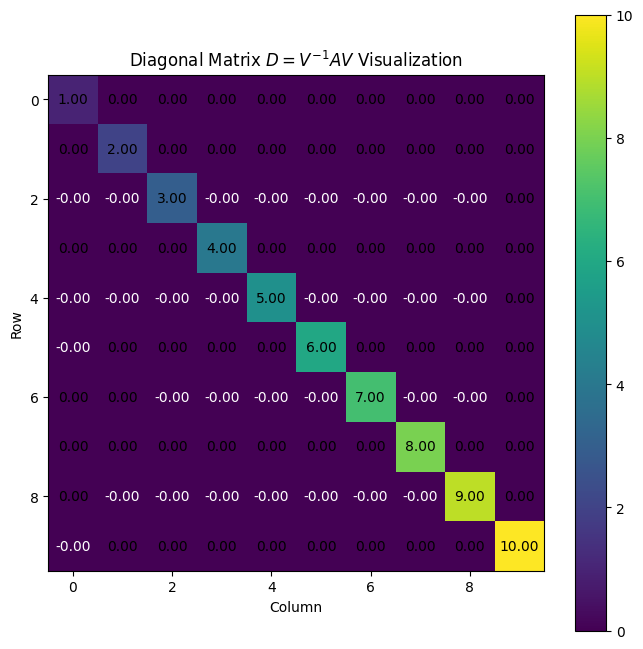

In [7]:
# Visualize the diagonal matrix D
plt.figure(figsize=(8, 8))
plt.imshow(D, cmap='viridis', interpolation='none')

# Add values to each cell in the matrix
for i in range(N):
    for j in range(N):
        plt.text(j, i, f"{D[i, j]:.2f}", ha='center', va='center', color='white' if D[i, j] < 0 else 'black')

plt.colorbar()
plt.title('Diagonal Matrix $D=V^{-1}AV$ Visualization')
plt.xlabel('Column')
plt.ylabel('Row')
plt.show()

In [8]:
# Testing complex domain
import torch

# Create a complex tensor
tensor = torch.tensor([1+2j, 3+4j, 5-6j], dtype=torch.complex64)

# Print the original tensor
print("Original tensor:")
print(tensor)

# Compute the conjugate of the tensor
tensor_conj = tensor.conj()

# Print the conjugate tensor
print("\nConjugate tensor:")
print(tensor_conj)

Original tensor:
tensor([1.+2.j, 3.+4.j, 5.-6.j])

Conjugate tensor:
tensor([1.-2.j, 3.-4.j, 5.+6.j])


In [9]:
# Testing Matmul
import torch

# 1D 벡터 정의
vector1 = torch.tensor([1, 2, 3])
vector2 = torch.tensor([4, 5, 6])

# 2D 행렬 정의
matrix1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
matrix2 = torch.tensor([[7, 8], [9, 10], [11, 12]])

# 고차원 텐서 정의 (배치 포함)
tensor1 = torch.randn(10, 3, 4)
tensor2 = torch.randn(10, 4, 5)

# @ 연산자 사용
result1 = vector1 @ vector2  # 내적
result2 = matrix1 @ vector1  # 행렬-벡터 곱
result3 = matrix1 @ matrix2  # 행렬-행렬 곱

# torch.matmul 사용
result4 = torch.matmul(vector1, vector2)  # 내적
result5 = torch.matmul(matrix1, vector1)  # 행렬-벡터 곱
result6 = torch.matmul(matrix1, matrix2)  # 행렬-행렬 곱
result7 = torch.matmul(tensor1, tensor2)  # 배치별 행렬 곱

# 결과 출력
print("Result with @ (vector1 @ vector2):", result1)
print("Result with @ (matrix1 @ vector1):", result2)
print("Result with @ (matrix1 @ matrix2):", result3)

print("Result with torch.matmul (vector1, vector2):", result4)
print("Result with torch.matmul (matrix1, vector1):", result5)
print("Result with torch.matmul (matrix1, matrix2):", result6)
print("Result with torch.matmul (tensor1, tensor2):", result7)


Result with @ (vector1 @ vector2): tensor(32)
Result with @ (matrix1 @ vector1): tensor([14, 32])
Result with @ (matrix1 @ matrix2): tensor([[ 58,  64],
        [139, 154]])
Result with torch.matmul (vector1, vector2): tensor(32)
Result with torch.matmul (matrix1, vector1): tensor([14, 32])
Result with torch.matmul (matrix1, matrix2): tensor([[ 58,  64],
        [139, 154]])
Result with torch.matmul (tensor1, tensor2): tensor([[[ 4.5681e-01,  1.4278e+00,  1.1363e+00, -1.4527e-01, -7.0167e-01],
         [-4.3180e+00,  3.1862e+00,  6.5458e-02,  1.2688e+00, -4.0215e-01],
         [ 3.7922e+00,  6.2936e-01,  8.7172e-01,  1.2332e+00,  2.9972e+00]],

        [[-5.3032e-01,  1.6684e+00, -6.4643e-01, -2.1676e-01,  3.2097e-01],
         [-1.1561e+00,  1.1042e+00, -1.6160e+00,  1.6548e+00,  3.2307e-01],
         [-3.8781e-01,  5.7601e-01, -2.3874e+00,  7.8683e-01, -2.9508e-01]],

        [[-3.3034e-01, -2.0349e+00,  3.1022e+00, -2.3127e+00,  6.5990e-02],
         [-1.4232e+00,  2.3771e-01, -1.54

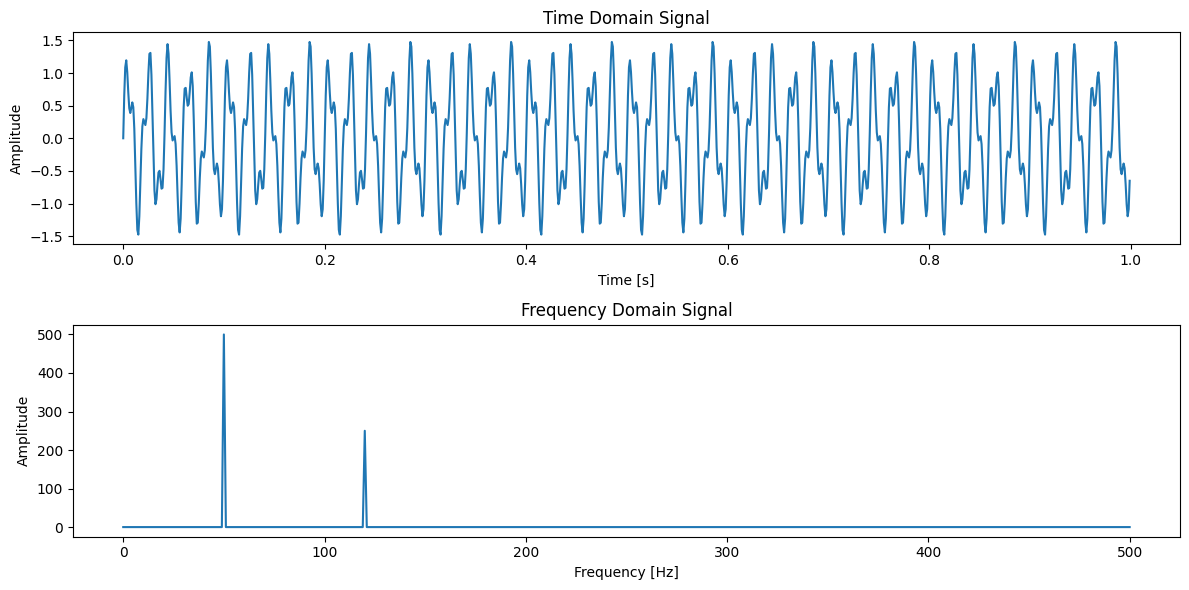

In [1]:
# torch.fft.rfft example
import torch
import numpy as np
import matplotlib.pyplot as plt

# 샘플링 주파수와 시간 축 정의
sampling_rate = 1000  # 1000Hz
T = 1.0 / sampling_rate
x = np.linspace(0.0, 1.0, sampling_rate, endpoint=False)

# 시간 도메인 신호 (여기서는 50Hz와 120Hz의 두 개의 사인파를 합성)
freq1 = 50.0
freq2 = 120.0
y = np.sin(freq1 * 2.0 * np.pi * x) + 0.5 * np.sin(freq2 * 2.0 * np.pi * x)

# PyTorch tensor로 변환
y_torch = torch.tensor(y, dtype=torch.float32)

# rFFT 적용
yf = torch.fft.rfft(y_torch)

# 주파수 축 정의
xf = np.fft.rfftfreq(sampling_rate, T)

# 결과 시각화
plt.figure(figsize=(12, 6))

# 원래 신호
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.title('Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# FFT 결과 (주파수 도메인)
plt.subplot(2, 1, 2)
plt.plot(xf, torch.abs(yf).numpy())
plt.title('Frequency Domain Signal')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
